This exercise aims at practicing and implementing cross-validation.

In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("../dataset/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

create a decision tree classifier.

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

Create a StratifiedKFold cross-validation object. Then use it inside the cross_val_score function to evaluate the decision tree. We first use the accuracy as a score function. Explicitly use the scoring parameter of cross_val_score to compute the accuracy (even if this is the default score).

In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(tree, data, target, cv=cv, scoring="accuracy")
print(f"Accuracy score: {scores.mean():.3f} ± {scores.std():.3f}")

Accuracy score: 0.633 ± 0.137


Repeat the experiment by computing the balanced_accuracy.

In [6]:
scores = cross_val_score(
    tree, data, target, cv=cv, scoring="balanced_accuracy"
)
print(f"Balanced accuracy score: {scores.mean():.3f} ± {scores.std():.3f}")

Balanced accuracy score: 0.502 ± 0.114


 show that computing the precision without providing the positive label is not supported by scikit-learn because it is indeed ambiguous.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
try:
    scores = cross_val_score(
        tree, data, target, cv=10, scoring="precision", error_score="raise"
    )
except ValueError as exc:
    print(exc)

pos_label=1 is not a valid label: It should be one of ['donated' 'not donated']


 import sklearn.metrics.make_scorer and sklearn.metrics.precision_score. Finally, create a scorer by calling make_scorer using the score function precision_score and pass the extra parameter pos_label="donated".

In [8]:
from sklearn.metrics import make_scorer, precision_score

precision = make_scorer(precision_score, pos_label="donated")

instead of providing the string "precision" to the scoring parameter in the cross_val_score call, pass the scorer that you created above.

In [9]:
scores = cross_val_score(tree, data, target, cv=cv, scoring=precision)
print(f"Precision score: {scores.mean():.3f} ± {scores.std():.3f}")

Precision score: 0.252 ± 0.167


Import sklearn.model_selection.cross_validate and compute the accuracy and balanced accuracy through cross-validation. Plot the cross-validation score for both metrics using a box plot.

In [10]:
from sklearn.model_selection import cross_validate

scoring = ["accuracy", "balanced_accuracy"]
scores = cross_validate(tree, data, target, cv=cv, scoring=scoring)
scores

{'fit_time': array([0.02207661, 0.02256846, 0.01673079, 0.01544166, 0.01959586,
        0.01304841, 0.00927401, 0.00673795, 0.00575423, 0.00767088]),
 'score_time': array([0.02249742, 0.01482797, 0.02473855, 0.01146126, 0.01540422,
        0.02025509, 0.00695181, 0.00739908, 0.00729728, 0.00630379]),
 'test_accuracy': array([0.26666667, 0.53333333, 0.77333333, 0.54666667, 0.64      ,
        0.64      , 0.72      , 0.78666667, 0.64864865, 0.75675676]),
 'test_balanced_accuracy': array([0.38450292, 0.48391813, 0.67982456, 0.37865497, 0.45906433,
        0.42105263, 0.56871345, 0.74561404, 0.4623323 , 0.51186791])}

In [16]:
import pandas as pd

color = {"whiskers": "black", "medians": "black", "caps": "black"}

metrics = pd.DataFrame(
    [scores["test_accuracy"], scores["test_balanced_accuracy"]],
    index=["Accuracy", "Balanced accuracy"],
).T

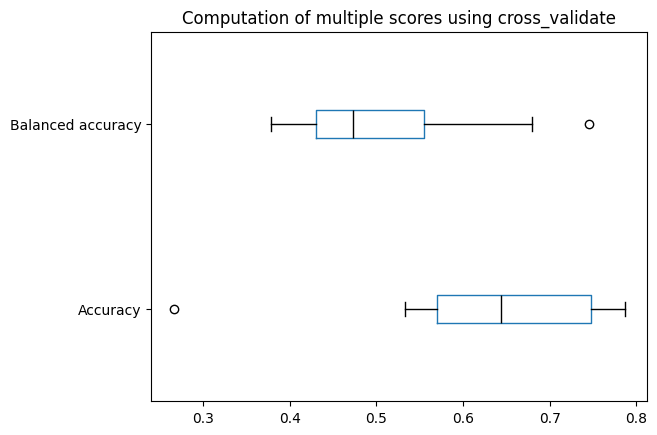

In [18]:
import matplotlib.pyplot as plt

metrics.plot.box(vert=False, color=color)
_ = plt.title("Computation of multiple scores using cross_validate")

The high accuracy is misleading due to class imbalance, as shown by the significantly lower balanced accuracy.